## Beam-splitter
Bare minimal illustration of cube type beam splitter is shown. However, all the apertures are still circular. The example is not a real case i.e., unreal combination of refractive indices is used to create a reflection and a transmission. It is just to give a glimpse of what could be possible.

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
import PyAstroPol as pap
pap.roundOffDisplay(5)

In [2]:
Source_analysis = pap.Source(10000, Clear=40)                       # Source for ray analysis
Source_analysis.translateOrigin(z=-100)                             # Adjust source position
#
Source_display = pap.Source(20, Clear=40)                           # Source for ray display
Source_display.translateOrigin(z=-100)                              # Adjust source (display) position
#
Lens_1 = pap.UncoatedLens(50, 10, R1=400, R2=-400, n=2.05)          # Lens
#
FrontSurf = pap.Surface(60, n1=1.0, n2=1.6)                         # Front surface
FrontSurf.translateOrigin(z=100)                              
MiddleSurf = pap.Surface(60, n1=1.6, n2=1.6)                        # Middle transmitting surface
MiddleSurf.rotateAboutX(45)
MiddleSurf.translateOrigin(z=130)
FoldingSurf = pap.Surface(60, n1=1.6, n2=1.1+6.8j, Mirror=True)     # Middle reflecting surface
FoldingSurf.rotateAboutX(45)
FoldingSurf.translateOrigin(z=130)
BackSurf = pap.Surface(60, n1=1.6, n2=1.0)                          # Back surface
BackSurf.translateOrigin(z=160)
SideSurf = pap.Surface(60, n1=1.6, n2=1.0)                          # Side surface
SideSurf.rotateAboutX(90)
SideSurf.translateOrigin(y=30, z=130)
#
Detector_1 = pap.Detector(20)                                       # Detector
Detector_1.translateOrigin(z=215)                                   # Adjust detector position
Detector_2 = pap.Detector(20)                                       # Second detector
Detector_2.rotateAboutX(90)                                         # Adjust the detector orientation
Detector_2.translateOrigin(z=130, y=85)                             # Adjust the detector position

In [3]:
# Transmitting part
Sys = pap.System(Source_analysis, [Lens_1, FrontSurf, MiddleSurf, BackSurf], 
             Detector_1, dRays=Source_display)                      # Complete optical system
Sys.propagateRays()                                                 # Propagate rays through system
# Reflecting part
Sys2 = pap.System(Source_analysis, [Lens_1, FrontSurf, FoldingSurf, SideSurf], 
             Detector_2, dRays=Source_display)                      # Complete optical system
Sys2.propagateRays()                                                # Propagate rays through system

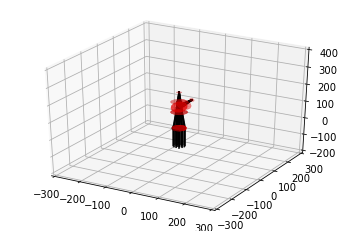

In [4]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                        # Draw optical system
Sys2.draw(Ax)
pap.adjustAspect(Ax, 600, z=100)                                    # Adjust 3D space
plt.show()

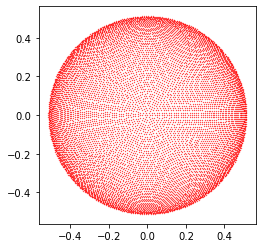

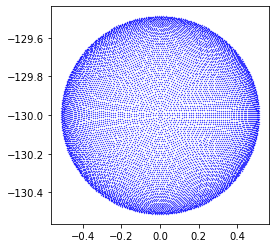

In [5]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')                       
Sys.drawSpotDiagram(Ax, s=0.1, color='r')                           # Draw spot diagram
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal') 
Sys2.drawSpotDiagram(Ax, s=0.1, color='b')                          # Draw spot diagram
plt.show()

In [6]:
MM, Tra = Sys2.getSystemMuellerMatrix()                             # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000  0.04963  0.00000  0.00000]
 [ 0.04963  1.00000  0.00000  0.00000]
 [-0.00000  0.00000 -0.94802 -0.31431]
 [ 0.00000 -0.00000  0.31431 -0.94802]]
Throughput is:  0.5988453705253568
